In [2]:
# 1. Importing and Exploring Data

import pandas as pd

# Load the dataset
data = pd.read_csv('app/data/diabetes_dataset1.csv')

# Display the first few rows of the dataset
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Basic info
print(data.info())


    Age  Gender  Polyuria  Polydipsia  Sudden Weight Loss  Weakness  \
0  23.0   False      True       False               False      True   
1  52.0    True      True        True               False      True   
2  47.0    True      True        True               False      True   
3  21.0   False     False        True                True      True   
4  50.0    True      True        True                True      True   

   Polyphagia  Genital Thrush  Visual Blurring  Itching  Irritability  \
0       False            True             True     True          True   
1        True           False            False     True          True   
2        True            True             True     True          True   
3        True           False            False    False         False   
4        True            True             True     True          True   

   Delayed Healing  Partial Paresis  Muscle Stiffness  Alopecia  Obesity  \
0             True             True              True     

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load dataset
data = pd.read_csv('app/data/diabetes_dataset1.csv')

# Convert boolean columns to integers
bool_columns = ['Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness',
                'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability',
                'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity', 'Class']
data[bool_columns] = data[bool_columns].astype(int)

# Identify feature types
numeric_features = ['Age']
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness',
                        'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability',
                        'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity']

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Save the preprocessed data to CSV files (optional)
pd.DataFrame(X_train).to_csv('X_train_preprocessed.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test_preprocessed.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

print("Data preprocessing completed successfully.")


Data preprocessing completed successfully.


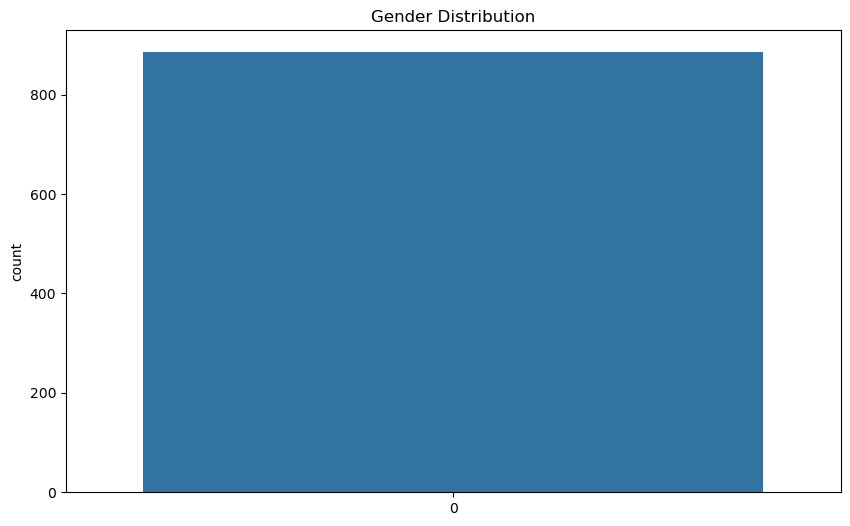

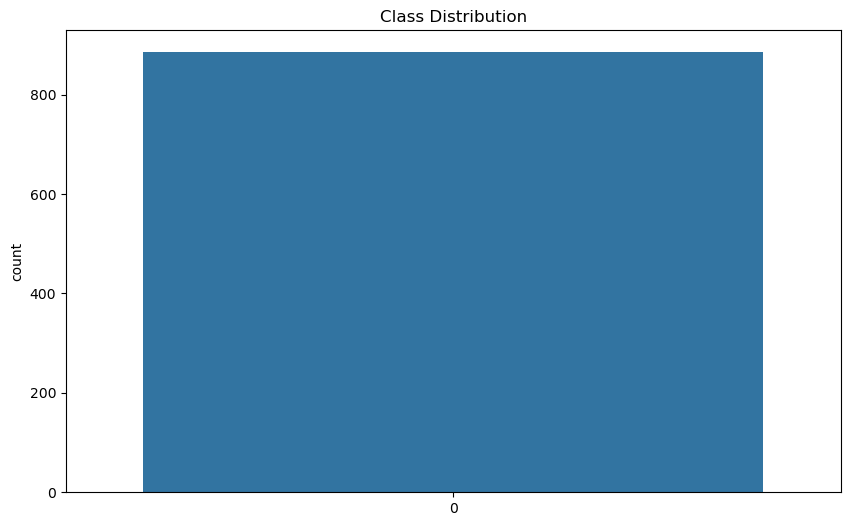

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


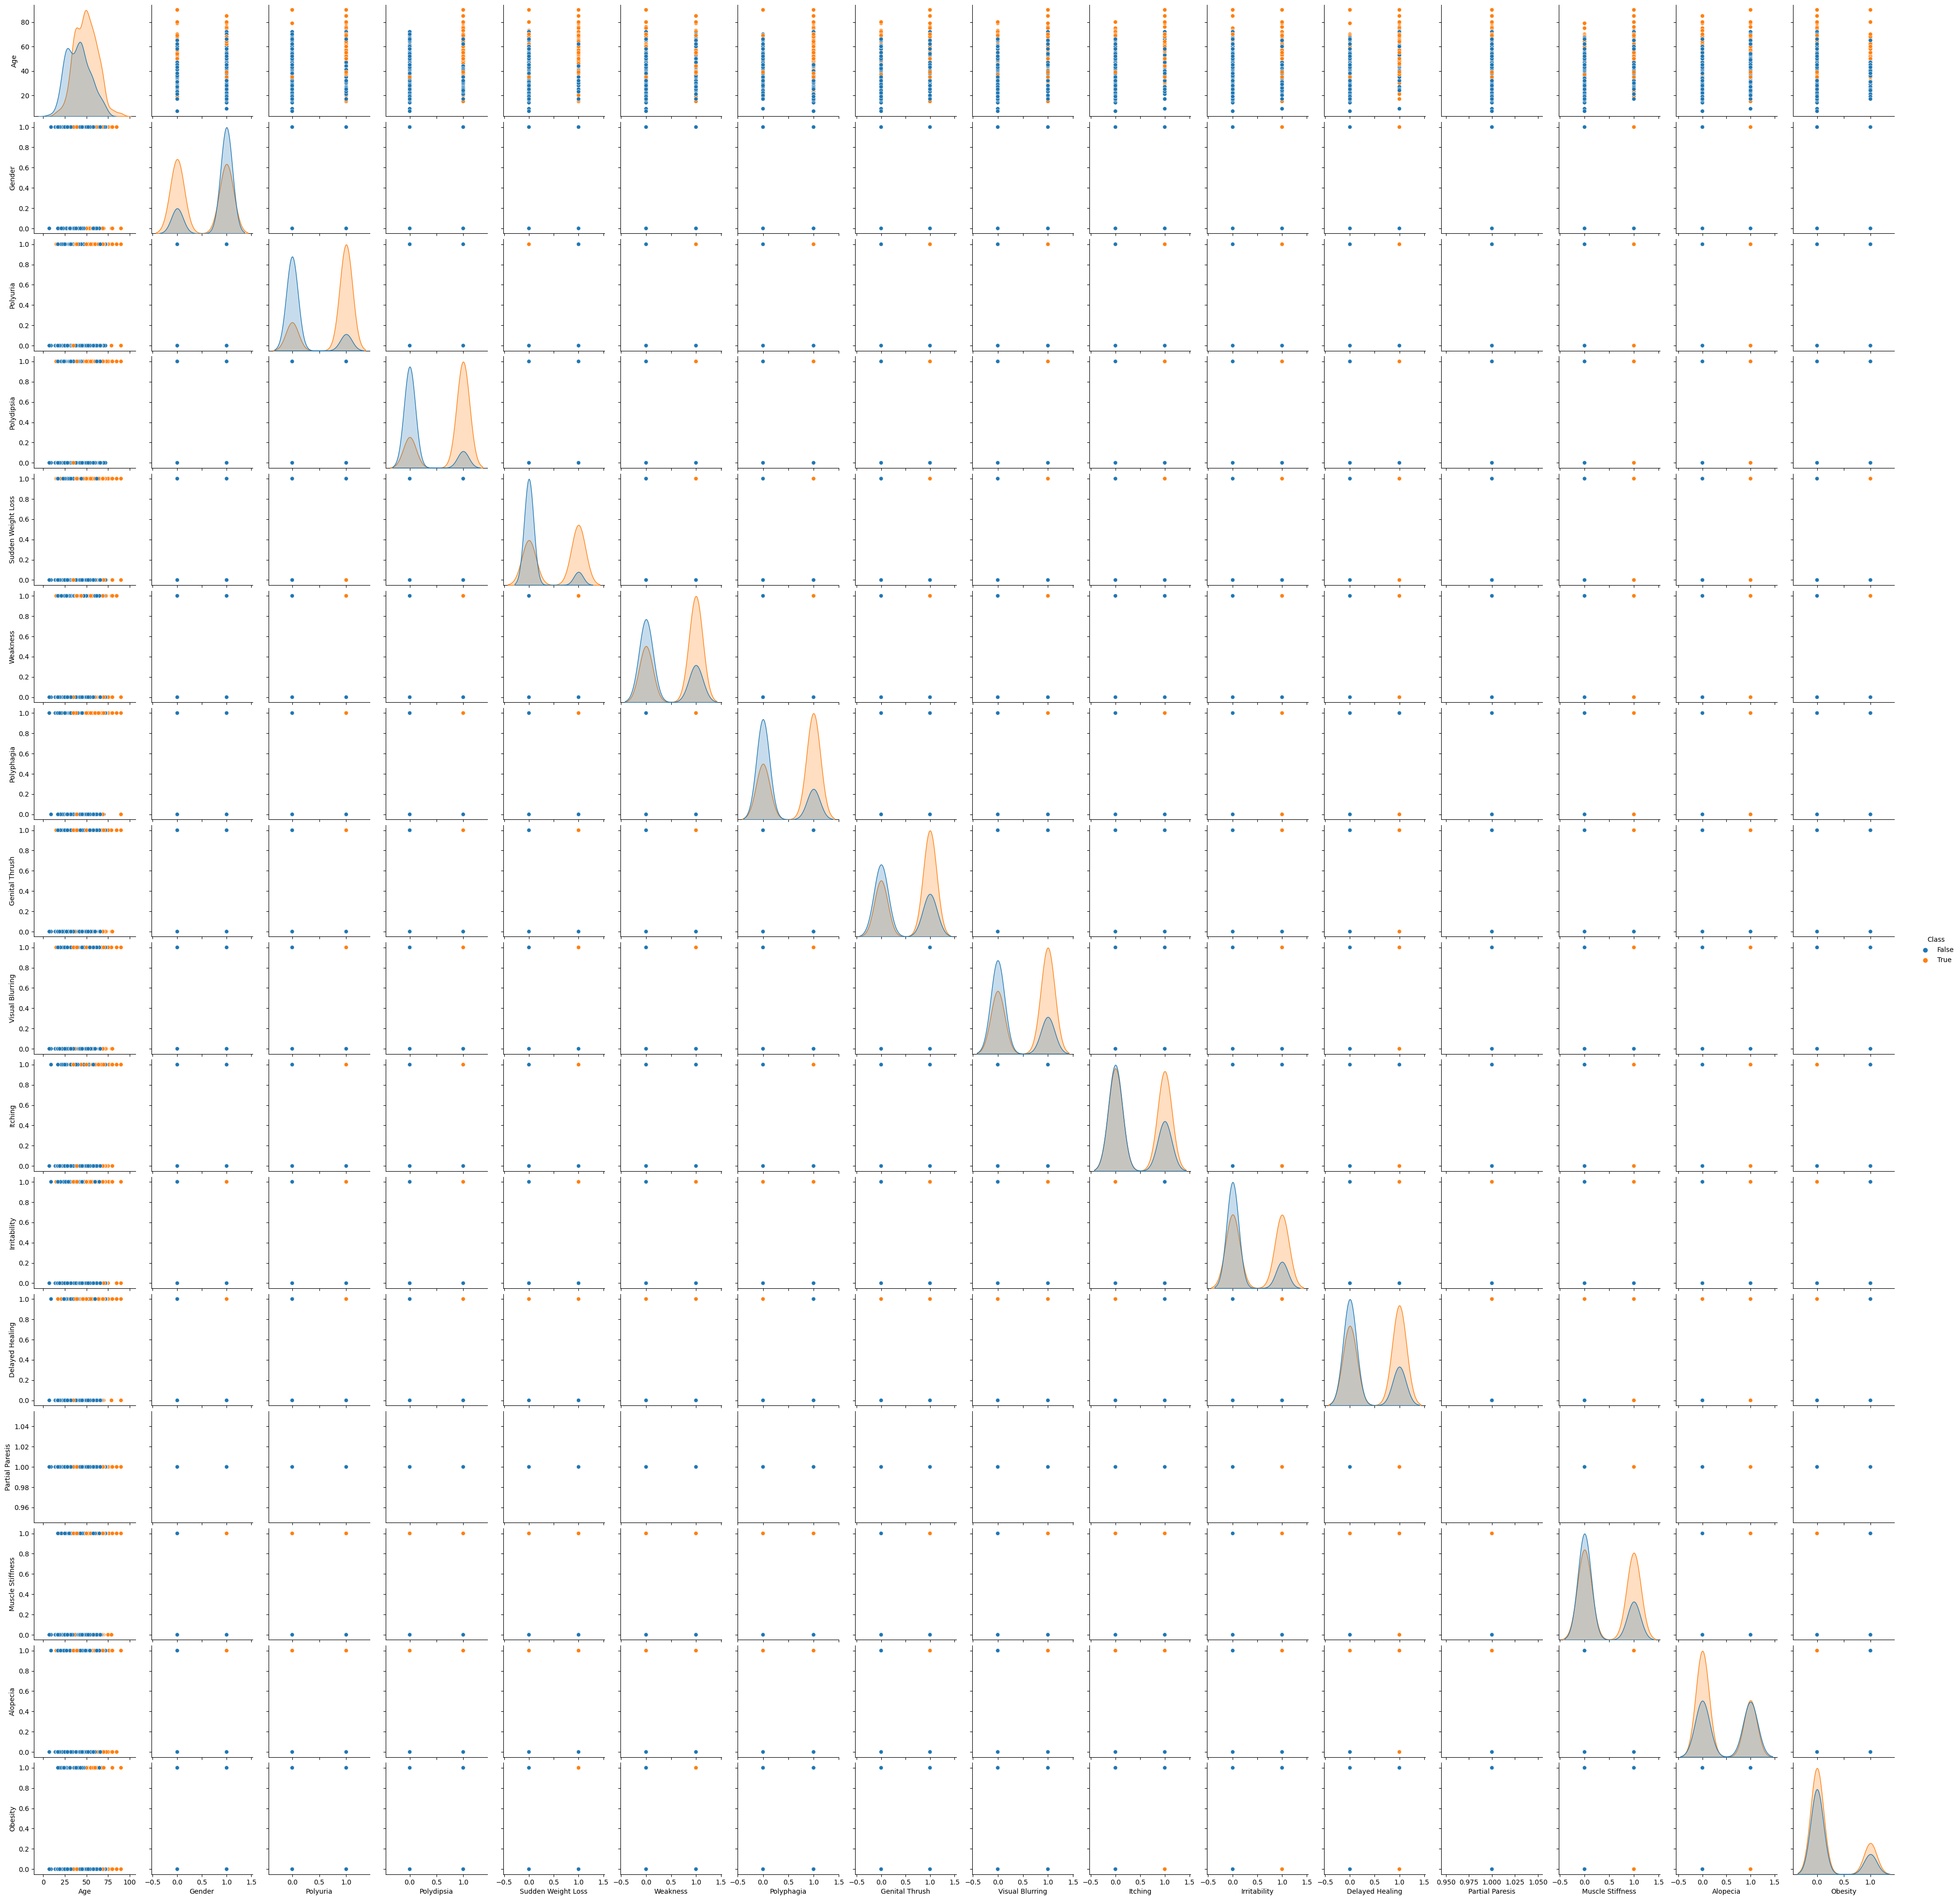

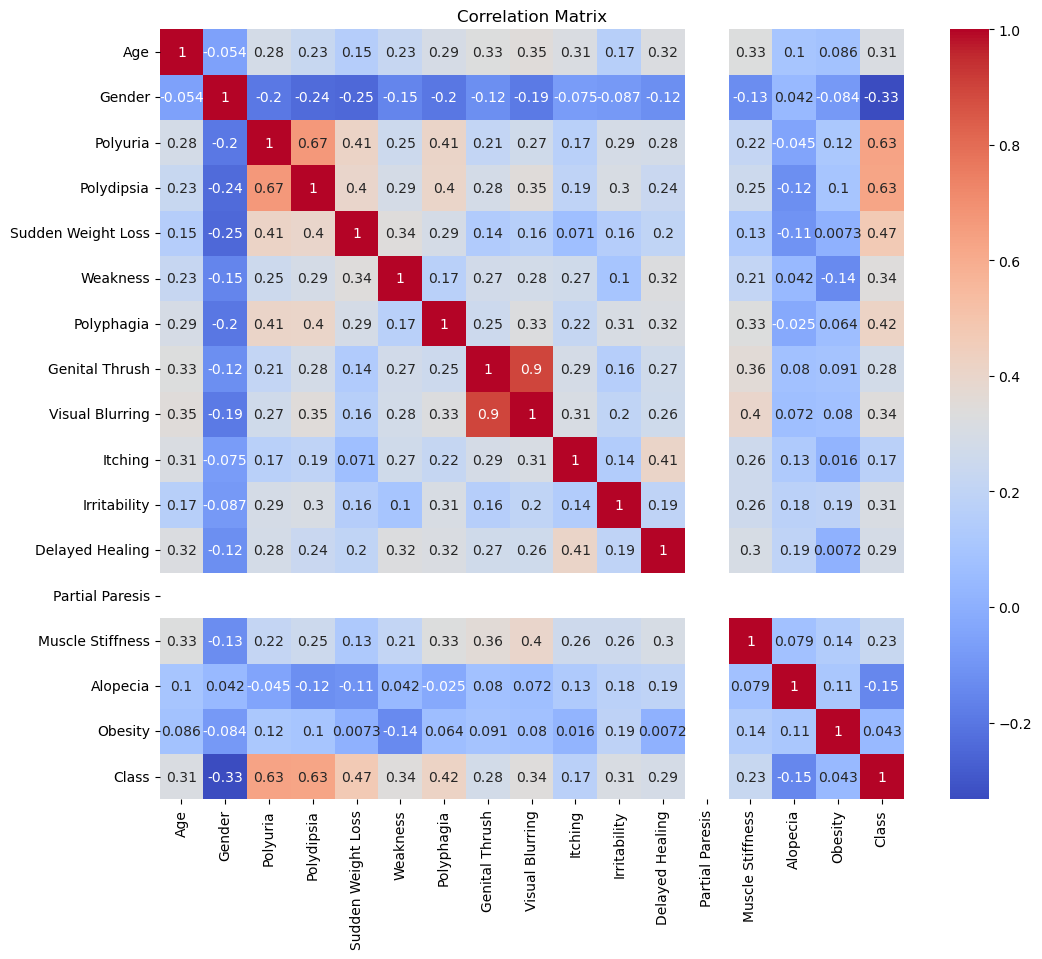

In [3]:
# 2. Data Analysis and Pattern Discovery

import matplotlib.pyplot as plt
import seaborn as sns

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')
plt.show()

# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

# Pairplot to see relationships between features
sns.pairplot(data, hue='Class')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


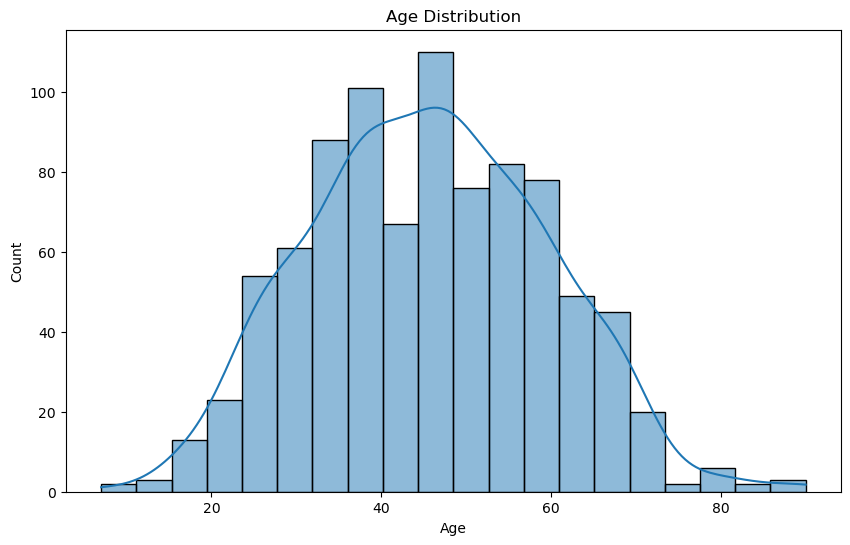

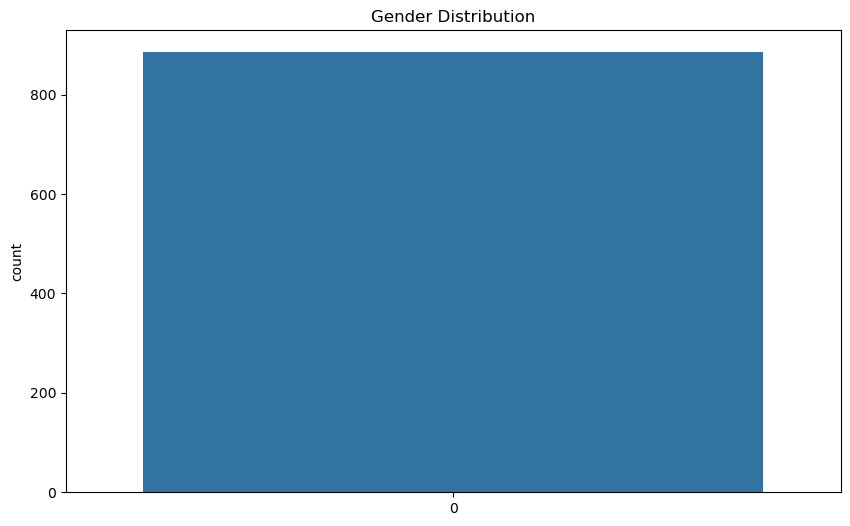

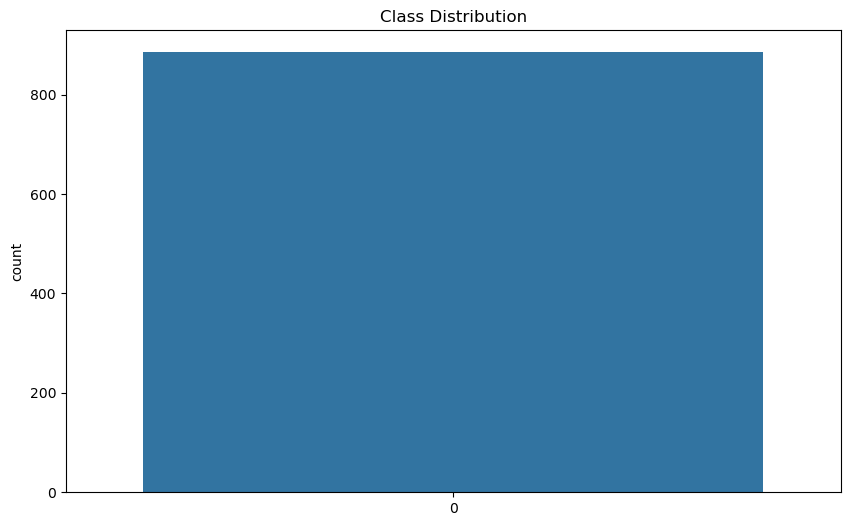

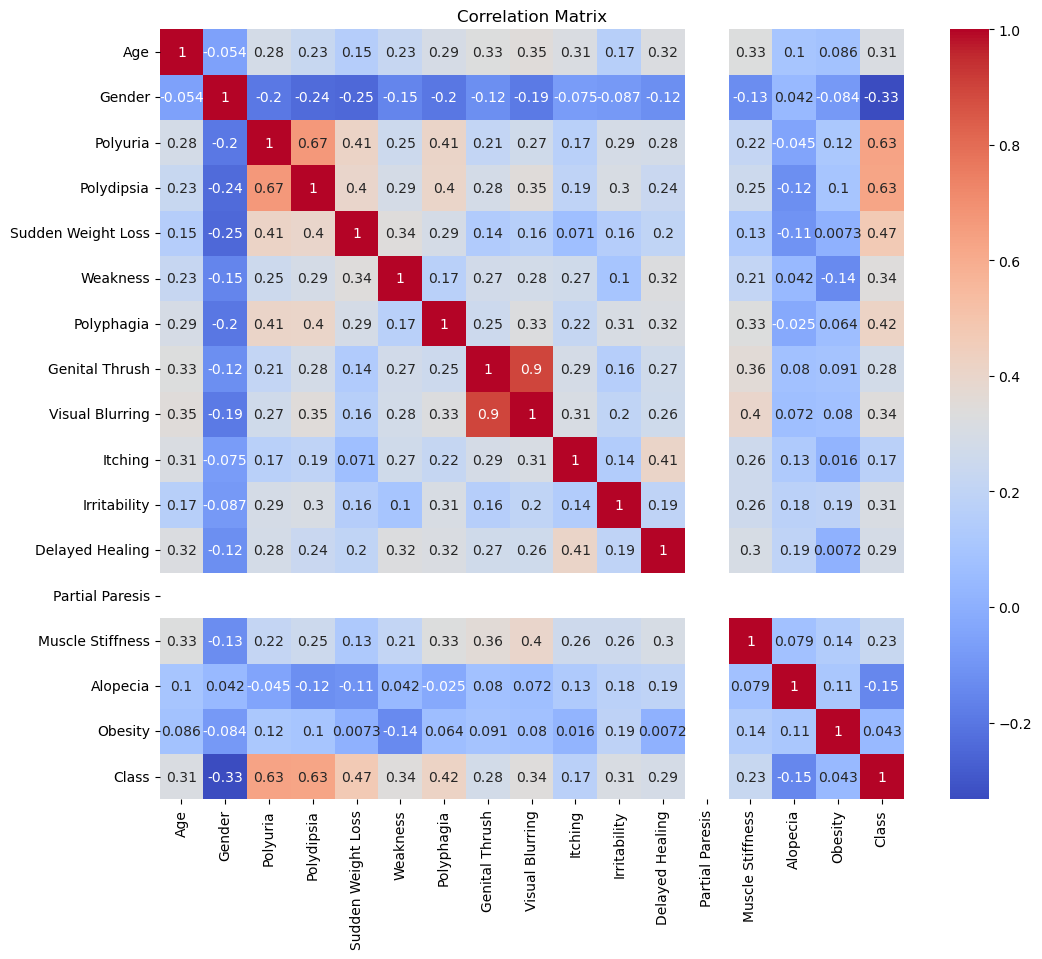

In [4]:
# 2. Data Analysis and Pattern Discovery

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['Gender'])
plt.title('Gender Distribution')
plt.show()

# Class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [5]:
# 3. Data Cleaning and Preparation

import pandas as pd

# Load the dataset
data = pd.read_csv('app/data/diabetes_dataset1.csv')

# Handle missing values (if any)
# For simplicity, we'll fill missing values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Encode categorical data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Convert boolean columns to integers
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

# Display cleaned data
print(data.head())


    Age  Gender  Polyuria  Polydipsia  Sudden Weight Loss  Weakness  \
0  23.0       0         1           0                   0         1   
1  52.0       1         1           1                   0         1   
2  47.0       1         1           1                   0         1   
3  21.0       0         0           1                   1         1   
4  50.0       1         1           1                   1         1   

   Polyphagia  Genital Thrush  Visual Blurring  Itching  Irritability  \
0           0               1                1        1             1   
1           1               0                0        1             1   
2           1               1                1        1             1   
3           1               0                0        0             0   
4           1               1                1        1             1   

   Delayed Healing  Partial Paresis  Muscle Stiffness  Alopecia  Obesity  \
0                1                1                 1     

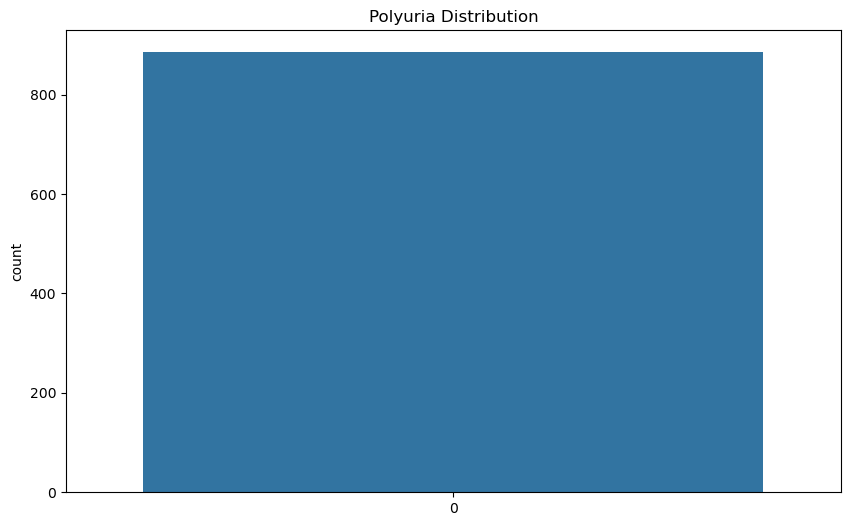

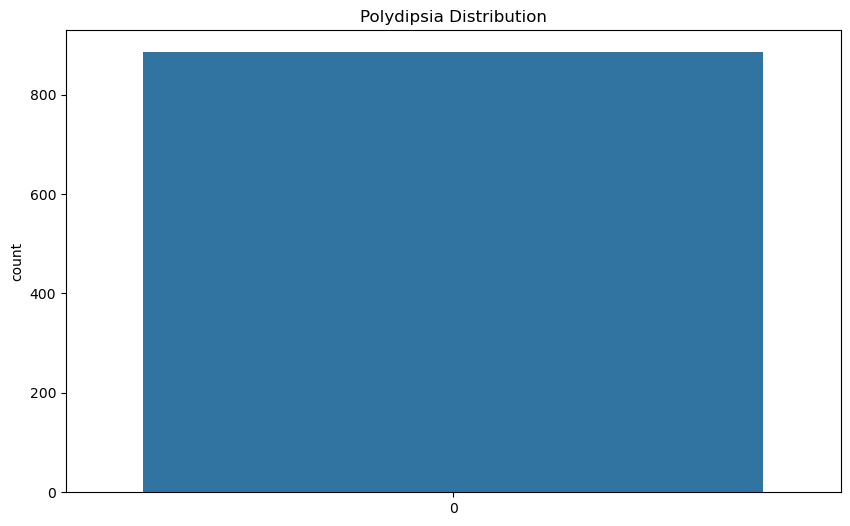

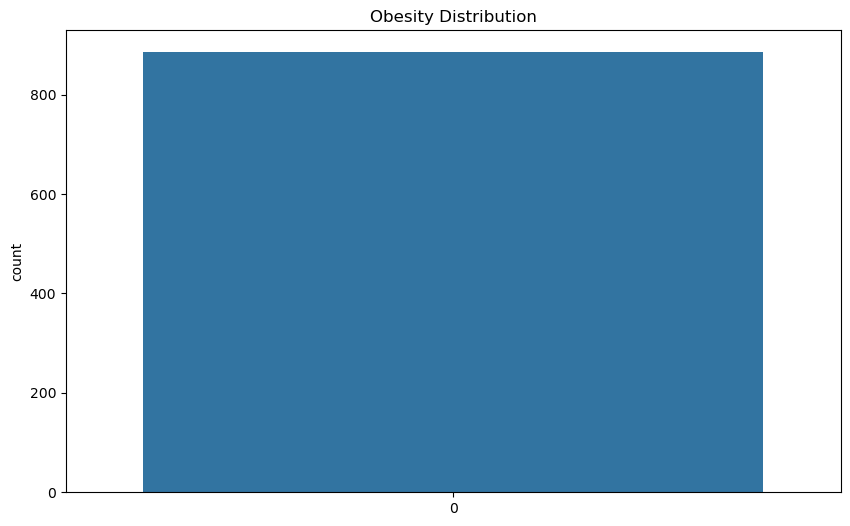

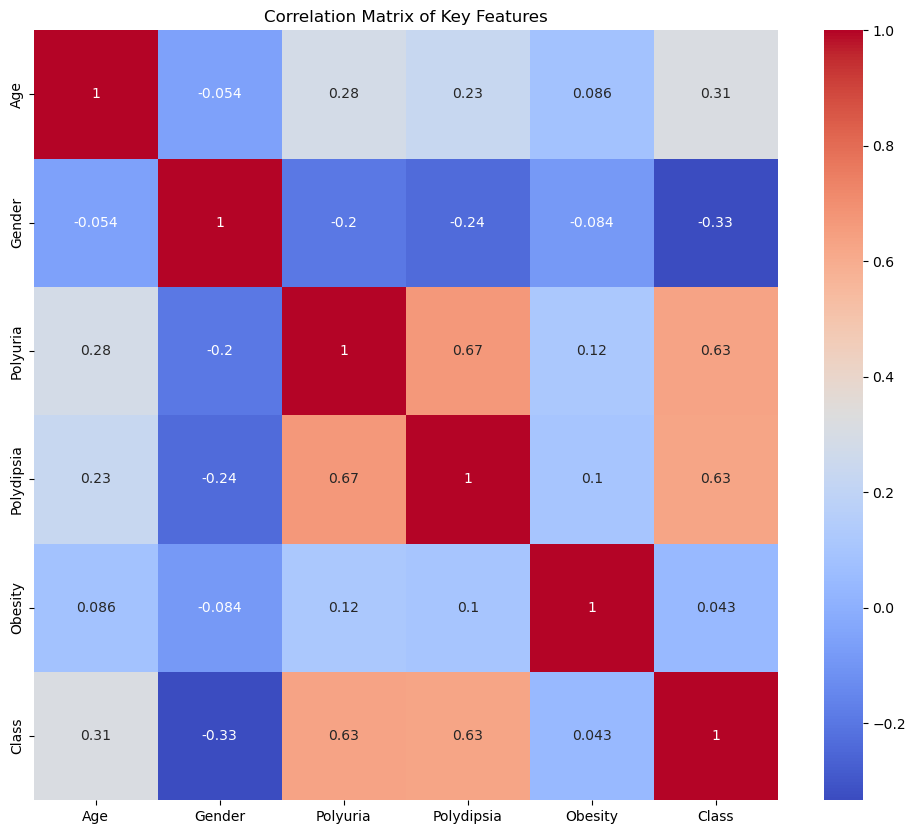

In [6]:
# 3. More Detailed Data Analysis

# Distribution of Polyuria
plt.figure(figsize=(10, 6))
sns.countplot(data['Polyuria'])
plt.title('Polyuria Distribution')
plt.show()

# Distribution of Polydipsia
plt.figure(figsize=(10, 6))
sns.countplot(data['Polydipsia'])
plt.title('Polydipsia Distribution')
plt.show()

# Distribution of Obesity
plt.figure(figsize=(10, 6))
sns.countplot(data['Obesity'])
plt.title('Obesity Distribution')
plt.show()

# Heatmap of correlations focusing on key features
plt.figure(figsize=(12, 10))
sns.heatmap(data[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Obesity', 'Class']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Features')
plt.show()


In [7]:
# 4. Data Processing and Transformation

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('app/data/diabetes_dataset1.csv')

# Encode categorical data and clean the data as done previously
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
for column in data.columns:
    if data[column].dtype == 'bool':
        data[column] = data[column].astype(int)

# Split the data into features and target
X = data.drop('Class', axis=1)
y = data['Class'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the preprocessed data for further use
pd.DataFrame(X_train).to_csv('X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)


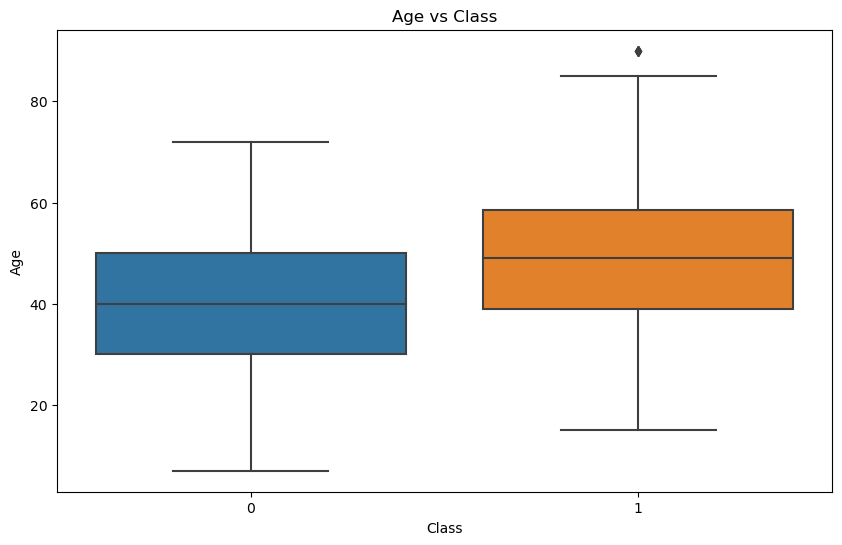

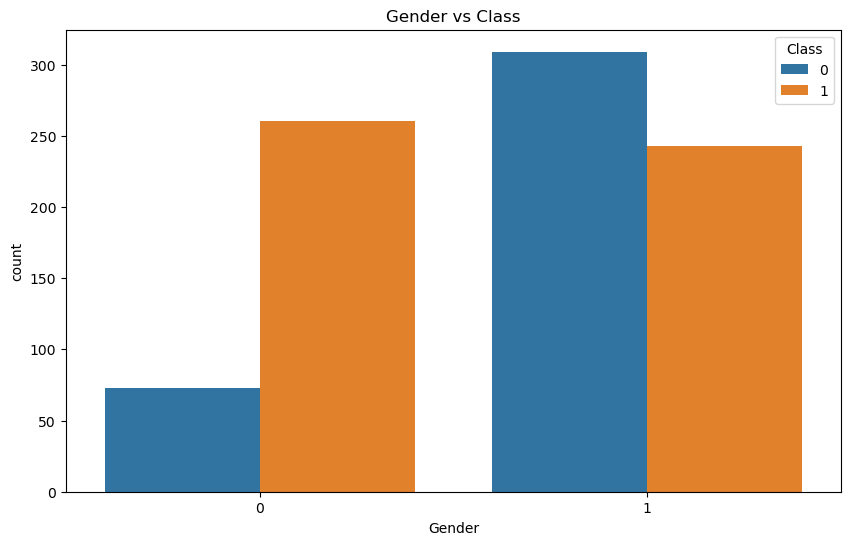

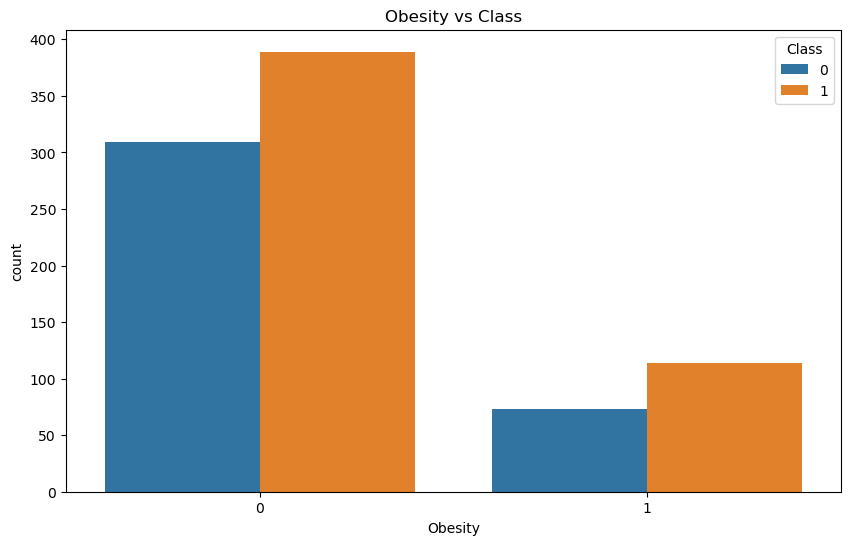

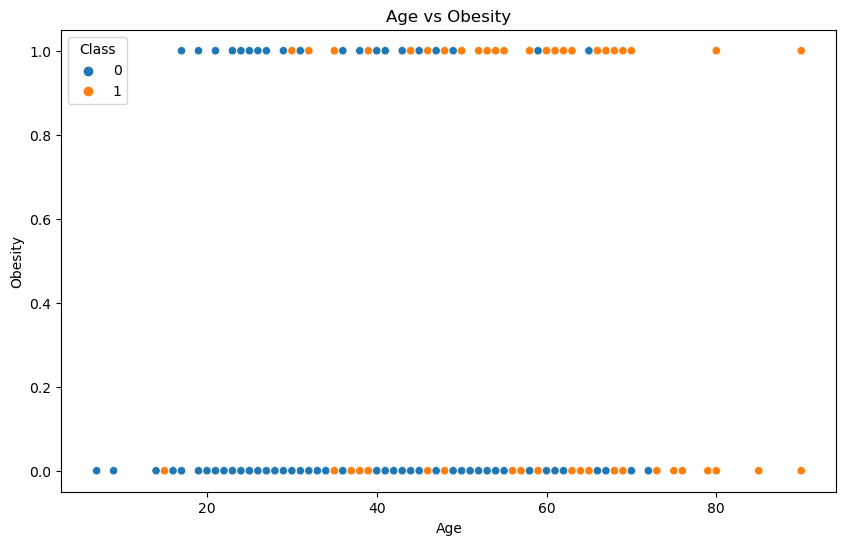

In [8]:
# 4. Bivariate Analysis

# Age vs Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Age', data=data)
plt.title('Age vs Class')
plt.show()

# Gender vs Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Class', data=data)
plt.title('Gender vs Class')
plt.show()

# Obesity vs Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Obesity', hue='Class', data=data)
plt.title('Obesity vs Class')
plt.show()

# Scatter plot of Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Obesity', hue='Class', data=data)
plt.title('Age vs Obesity')
plt.show()


In [9]:
# 5. Model Building and Training

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Build the neural network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Save the training history
import joblib
joblib.dump(history.history, 'training_history.pkl')


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6057 - loss: 0.6835 - val_accuracy: 0.7627 - val_loss: 0.5531
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7909 - loss: 0.5350 - val_accuracy: 0.8418 - val_loss: 0.4333
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8415 - loss: 0.4304 - val_accuracy: 0.8475 - val_loss: 0.3645
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8469 - loss: 0.3564 - val_accuracy: 0.8814 - val_loss: 0.3313
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8718 - loss: 0.3296 - val_accuracy: 0.8814 - val_loss: 0.3122
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8650 - loss: 0.3285 - val_accuracy: 0.8701 - val_loss: 0.2991
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8790 - loss: 0.2943 - val_accuracy: 0.8701 - val_loss: 0.2918
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8935 - loss: 0.2542 - val_accuracy: 0.8701 - 

['training_history.pkl']

In [4]:
# 5. Model Building and Training

import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the preprocessed data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

# Ensure y_train and y_test are in the correct shape
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Build the neural network
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Train Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Save the training history
import joblib
joblib.dump(history.history, 'training_history.pkl')


Epoch 1/100


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5000 - loss: 0.7729 - val_accuracy: 0.8588 - val_loss: 0.5033
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8333 - loss: 0.4655 - val_accuracy: 0.8870 - val_loss: 0.3331
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.3252 - val_accuracy: 0.9040 - val_loss: 0.2789
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9038 - loss: 0.2720 - val_accuracy: 0.9040 - val_loss: 0.2602
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8992 - loss: 0.2720 - val_accuracy: 0.8983 - val_loss: 0.2619
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9105 - loss: 0.2435 - val_accuracy: 0.9096 - val_loss: 0.2493
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9169 - loss: 0.2441 - val_accuracy: 0.9153 - val_loss: 0.2392
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9194 - loss: 0.2187 - val_accuracy: 0.9153 - val_loss: 0.2

['training_history.pkl']

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


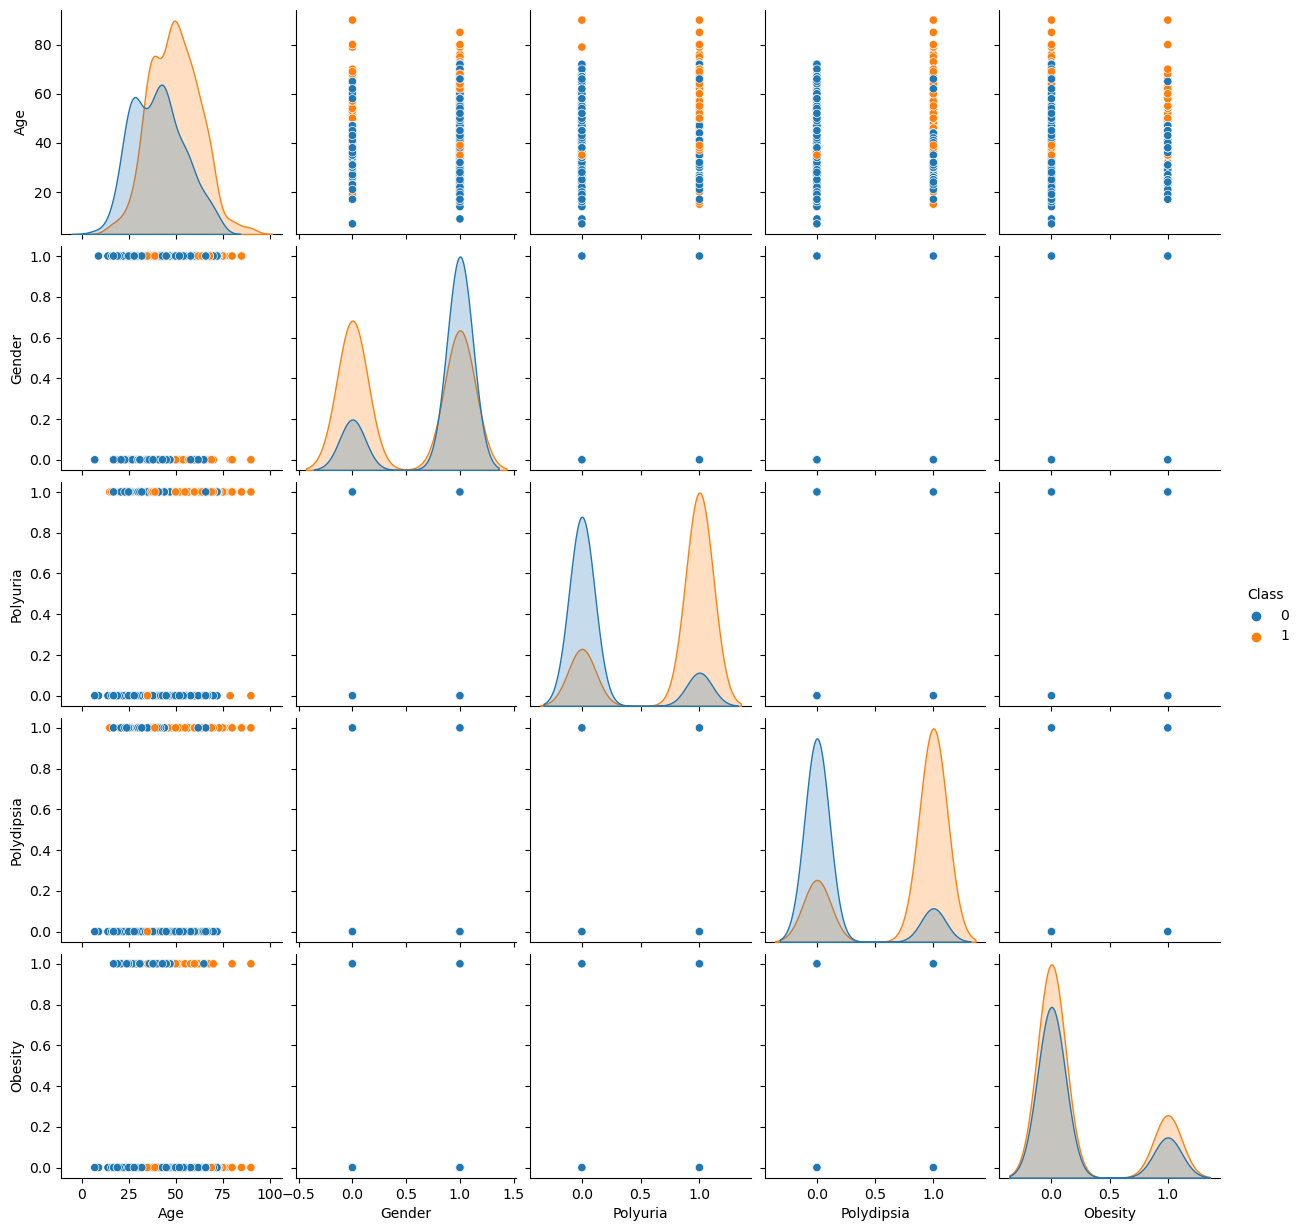

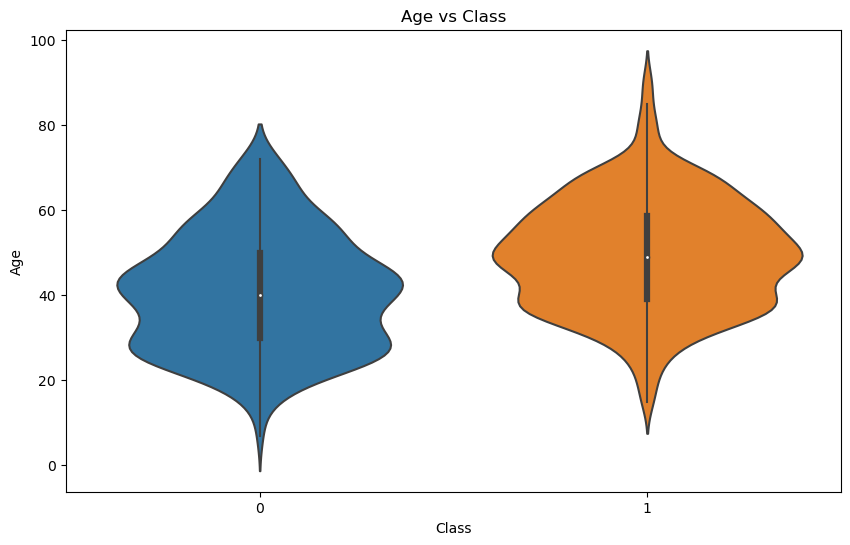

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


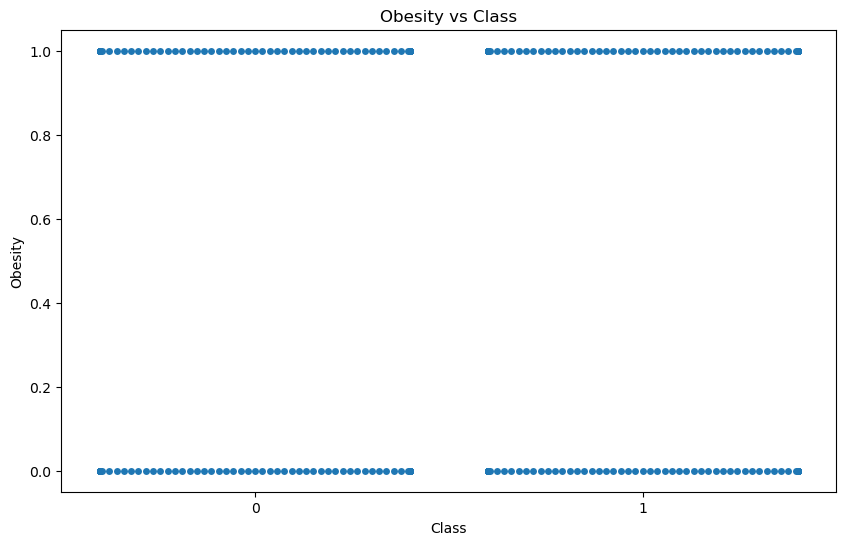

In [10]:
# 5. Multiple Plots

# Pairplot to see relationships between features
sns.pairplot(data[['Age', 'Gender', 'Polyuria', 'Polydipsia', 'Obesity', 'Class']], hue='Class')
plt.show()

# Violin plot of Age vs Class
plt.figure(figsize=(10, 6))
sns.violinplot(x='Class', y='Age', data=data)
plt.title('Age vs Class')
plt.show()

# Swarm plot of Obesity vs Class
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Class', y='Obesity', data=data)
plt.title('Obesity vs Class')
plt.show()


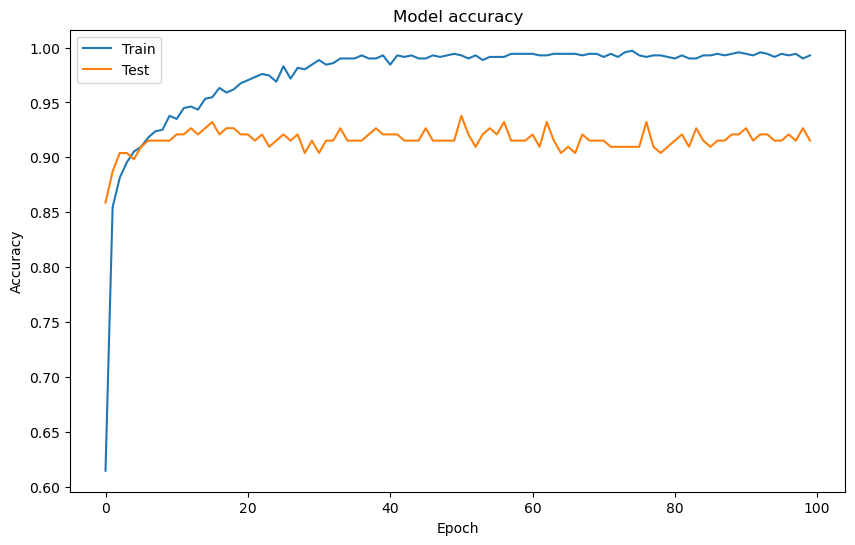

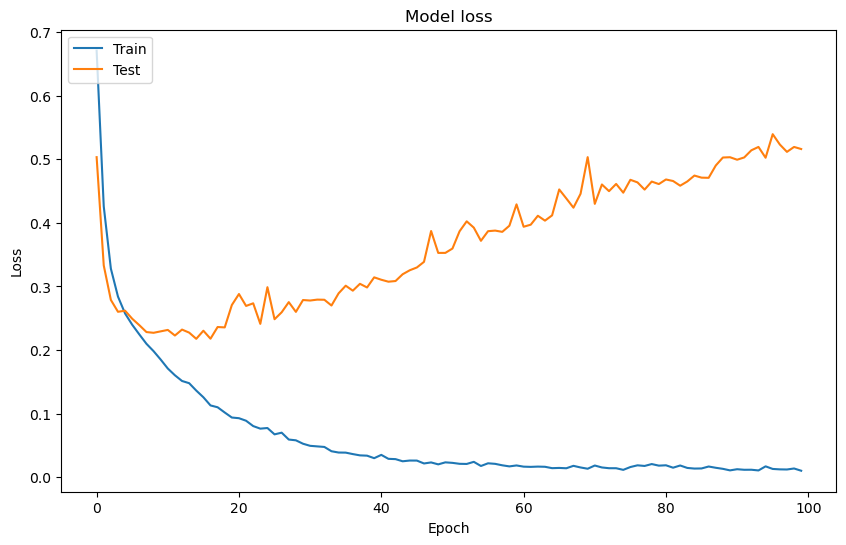

In [5]:
# 6. Model Evaluation and Performance Analysis

import pandas as pd
import matplotlib.pyplot as plt
import joblib

# Load the training history
history = joblib.load('training_history.pkl')

# Plot training & validation accuracy values
plt.figure(figsize=(10, 6))
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [13]:
# 6. Time Series Analysis (if applicable)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming there's a Date column in the dataset
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    
    # Plotting the data over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Obesity', hue='Class', data=data)
    plt.title('Obesity over Time')
    plt.show()
    
    # Plotting the data over time by Gender
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Obesity', hue='Gender', data=data)
    plt.title('Obesity over Time by Gender')
    plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import joblib

# Load dataset
data = pd.read_csv('app/data/diabetes_dataset1.csv')

# Convert boolean columns to integers
bool_columns = ['Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness',
                'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability',
                'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity', 'Class']
data[bool_columns] = data[bool_columns].astype(int)

# Identify feature types
numeric_features = ['Age']
categorical_features = ['Gender', 'Polyuria', 'Polydipsia', 'Sudden Weight Loss', 'Weakness',
                        'Polyphagia', 'Genital Thrush', 'Visual Blurring', 'Itching', 'Irritability',
                        'Delayed Healing', 'Partial Paresis', 'Muscle Stiffness', 'Alopecia', 'Obesity']

# Preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data into training and testing sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Save the preprocessed data to CSV files (optional)
pd.DataFrame(X_train).to_csv('X_train_preprocessed.csv', index=False)
pd.DataFrame(X_test).to_csv('X_test_preprocessed.csv', index=False)
pd.DataFrame(y_train).to_csv('y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('y_test.csv', index=False)

print("Data preprocessing completed successfully.")

# Build the neural network
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Save the training history
joblib.dump(history.history, 'training_history.pkl')

# 7. Model Saving and Results Interpretation

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Testing Accuracy: {test_accuracy:.4f}')

# Save the model, preprocessor, and scaler
model.save('diabetes_model.h5')
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(numeric_transformer.named_steps['scaler'], 'scaler.pkl')

# Interpretation of results
print(f'Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.4f}')


Data preprocessing completed successfully.
Epoch 1/100


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6302 - loss: 0.6523 - val_accuracy: 0.8192 - val_loss: 0.4912
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8123 - loss: 0.5102 - val_accuracy: 0.8531 - val_loss: 0.3990
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8485 - loss: 0.4164 - val_accuracy: 0.8644 - val_loss: 0.3202
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8602 - loss: 0.3412 - val_accuracy: 0.8870 - val_loss: 0.3059
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3441 - val_accuracy: 0.8983 - val_loss: 0.2931
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9031 - loss: 0.2790 - val_accuracy: 0.8927 - val_loss: 0.2931
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8816 - loss: 0.2927 - val_accuracy: 0.8927 - val_loss: 0.2845
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9015 - loss: 0.2748 - val_accuracy: 0.8983 - val_loss: 0.2

Training Accuracy: 0.9816
Testing Accuracy: 0.9153
Training Loss: 0.0664, Training Accuracy: 0.9816
Testing Loss: 0.2828, Testing Accuracy: 0.9153


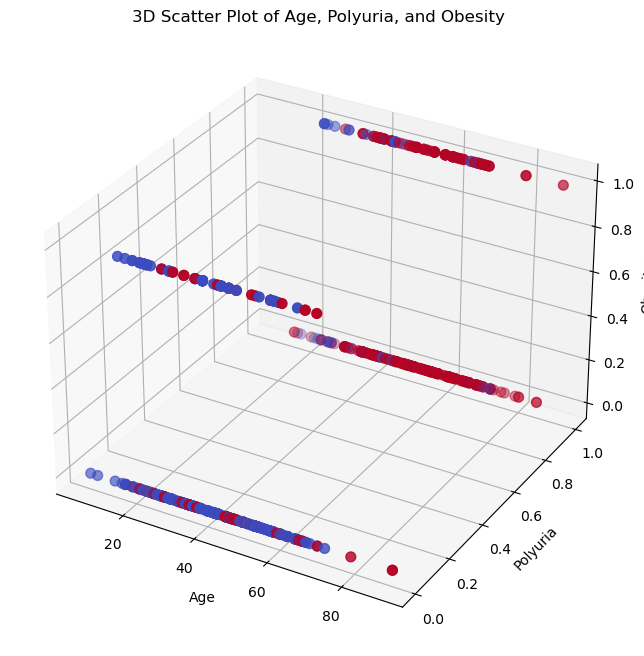

In [14]:
# 7. 3D Plots

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# 3D scatter plot of Age, Polyuria, and Obesity
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Age'], data['Polyuria'], data['Obesity'], c=data['Class'], cmap='coolwarm', s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Polyuria')
ax.set_zlabel('Obesity')
plt.title('3D Scatter Plot of Age, Polyuria, and Obesity')
plt.show()
